In [1]:
import pandas as pd
import numpy as np

In [5]:
s = pd.Series([1,3,6,np.nan,4,1]) # similar with 1D numpy
print(s)

0    1.0
1    3.0
2    6.0
3    NaN
4    4.0
5    1.0
dtype: float64


In [6]:
dates = pd.date_range('20160101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])
print(df['B'])

2016-01-01    0.780484
2016-01-02    1.945188
2016-01-03    0.087811
2016-01-04   -0.407905
2016-01-05    0.475960
2016-01-06    2.105168
Freq: D, Name: B, dtype: float64


In [7]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [8]:
np.arange(12).reshape((3,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
df1[0]

0    0
1    4
2    8
Name: 0, dtype: int64

In [10]:
df2 = pd.DataFrame({'A' : 1.,
                       'B' : pd.Timestamp('20130102'),
                        'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                        'D' : np.array([3] * 4,dtype='int32'),
                        'E' : pd.Categorical(["test","train","test","train"]),
                        'F' : 'foo'})

In [11]:
print(df2)
print(df2.dtypes)

print(df.index)
print(df.columns)
print(df.values)
print(df.describe())
print(df.T)
print(df.sort_index(axis=1, ascending=False))
print(df.sort_values(by='B'))

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object
DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[ 1.23702312  0.78048386  0.06718038  0.71398285]
 [ 1.62949789  1.94518775 -1.13248746 -0.66894075]
 [ 1.29960975  0.08781089 -1.0241899  -0.15097149]
 [ 0.37178662 -0.40790533  1.90223123 -1.16126169]
 [ 1.78695732  0.47595982  0.43092107 -1.28947338]
 [-1.7874113   2.10516825 -2.24734622  2.00720006]]
              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.756244  0.831118 -0.333948 -0.091577
std    1.339353  1.00804

In [12]:
# 数据选择
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A', 'B', 'C', 'D'])

print(df['A'], df.A)
print(df[0:3], df['20130102':'20130104'])

# select by label: loc
print(df.loc['20130102'])
print(df.loc[:,['A','B']])
print(df.loc['20130102', ['A','B']])

# select by position: iloc
print(df.iloc[3])
print(df.iloc[3, 1])
print(df.iloc[3:5,0:2])
print(df.iloc[[1,2,4],[0,2]])

# mixed selection: ix
print(df.ix[:3, ['A', 'C']])
# Boolean indexing
print(df[df.A > 0])

2013-01-01    0.167593
2013-01-02   -0.485729
2013-01-03    0.655266
2013-01-04   -0.053871
2013-01-05    0.347769
2013-01-06   -1.224213
Freq: D, Name: A, dtype: float64 2013-01-01    0.167593
2013-01-02   -0.485729
2013-01-03    0.655266
2013-01-04   -0.053871
2013-01-05    0.347769
2013-01-06   -1.224213
Freq: D, Name: A, dtype: float64
                   A         B         C         D
2013-01-01  0.167593  0.961109  1.804788  0.630990
2013-01-02 -0.485729 -0.420297  0.627075  0.475410
2013-01-03  0.655266 -1.520673  1.542890  1.087777                    A         B         C         D
2013-01-02 -0.485729 -0.420297  0.627075  0.475410
2013-01-03  0.655266 -1.520673  1.542890  1.087777
2013-01-04 -0.053871  0.599189 -1.748728  1.056960
A   -0.485729
B   -0.420297
C    0.627075
D    0.475410
Name: 2013-01-02 00:00:00, dtype: float64
                   A         B
2013-01-01  0.167593  0.961109
2013-01-02 -0.485729 -0.420297
2013-01-03  0.655266 -1.520673
2013-01-04 -0.053871  0.5991

/Users/lz/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [13]:
# set value
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A', 'B', 'C', 'D'])

df.iloc[2,2] = 1111
df.loc['2013-01-03', 'D'] = 2222
df.A[df.A>0] = 0
df['F'] = np.nan
df['G']  = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130101', periods=6))
print(df)

                   A         B            C            D   F  G
2013-01-01 -0.657193 -0.357947     1.209640     0.869620 NaN  1
2013-01-02  0.000000  1.406592     2.466116     0.844006 NaN  2
2013-01-03 -1.157041  1.449680  1111.000000  2222.000000 NaN  3
2013-01-04 -1.849833 -0.325464     0.632096     1.230206 NaN  4
2013-01-05  0.000000  0.455729     0.183005    -0.600350 NaN  5
2013-01-06  0.000000 -0.395972     0.675166     0.688309 NaN  6


In [14]:
# nan
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)), index=dates, columns=['A', 'B', 'C', 'D'])

df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
print(df.dropna(axis=0, how='any'))   # how={'any', 'all'}
print(df.fillna(value=0))
print(pd.isnull(df))

             A     B     C   D
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23
             A     B     C   D
2013-01-01   0   0.0   2.0   3
2013-01-02   4   5.0   0.0   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23
                A      B      C      D
2013-01-01  False   True  False  False
2013-01-02  False  False   True  False
2013-01-03  False  False  False  False
2013-01-04  False  False  False  False
2013-01-05  False  False  False  False
2013-01-06  False  False  False  False


In [15]:
# concatenating
# ignore index
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
print(df1)
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
print(df2)
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
print(df3)
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print(res)
# join, ('inner', 'outer')
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
print(df1)
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d', 'e'], index=[2,3,4])
print(df2)
res = pd.concat([df1, df2], axis=1, join='outer')
print(res)
res = pd.concat([df1, df2], axis=1, join='inner')
print(res)

# join_axes
res = pd.concat([df1, df2], axis=1, join_axes=[df1.index])
print(res)
# append
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d', 'e'], index=[2,3,4])
res = df1.append(df2, ignore_index=True)
print(res)
res = df1.append([df2, df3])
print(res)

s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])
res = df1.append(s1, ignore_index=True)

print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0
     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0
     a    b    c    d    b    c    d    e
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
    

/Users/lz/.pyenv/versions/3.6.3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [16]:
# merging two df by key/keys. (may be used in database)
# simple example
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                                  'A': ['A0', 'A1', 'A2', 'A3'],
                                  'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                                    'C': ['C0', 'C1', 'C2', 'C3'],
                                    'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)
res = pd.merge(left, right, on='key')
print(res)

# consider two keys
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                             'key2': ['K0', 'K1', 'K0', 'K1'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                              'key2': ['K0', 'K0', 'K0', 'K0'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')  # default for how='inner'
# how = ['left', 'right', 'outer', 'inner']
res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)

# indicator
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
print(df1)
print(df2)
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
# give the indicator a custom name
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')


# merged by index
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                                  'B': ['B0', 'B1', 'B2']},
                                  index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                                     'D': ['D0', 'D2', 'D3']},
                                      index=['K0', 'K2', 'K3'])
print(left)
print(right)
# left_index and right_index
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')

# handle overlapping
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

# join function in pandas is similar with merge. If know merge, you will understand join

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3
  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3
  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3
  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN
   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2
     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3
    k  age_boy  age_girl
0  K0        1         4
1  K0        1         5


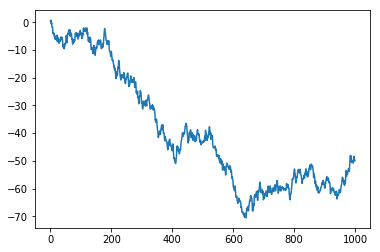

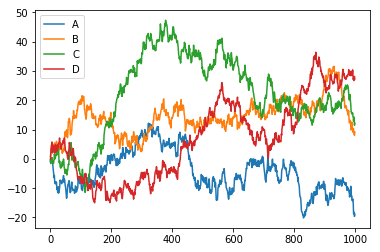

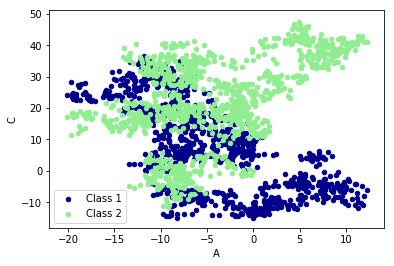

In [22]:
import matplotlib.pyplot as plt

# plot data

# Series
data = pd.Series(np.random.randn(1000), index=np.arange(1000))
data = data.cumsum()
data.plot()

# DataFrame
data = pd.DataFrame(np.random.randn(1000, 4), index=np.arange(1000), columns=list("ABCD"))
data = data.cumsum()
data.plot()

# plot methods:
# 'bar', 'hist', 'box', 'kde', 'area', scatter', hexbin', 'pie'
ax = data.plot.scatter(x='A', y='D', color='DarkBlue', label="Class 1")
data.plot.scatter(x='A', y='C', color='LightGreen', label='Class 2', ax=ax)

plt.show()